\begin{equation}
\omega = \Omega\, T_s
\end{equation}

\begin{equation}
\omega = \frac{2\pi k}{N},\; k=0, \dotsc, N-1
\end{equation}

\begin{equation}
X_d(\omega) = \frac{1}{T_s} \sum_{k=-\infty}^\infty X_c\biggl(\frac{\omega - 2\pi k}{T_s}\biggr)
\end{equation}

\begin{equation}
\text{rect}(t) =
\begin{cases}
1 & |t| \leq \frac{1}{2} \\ 
0 & \text{otherwise}
\end{cases}
\end{equation}

\begin{equation}
\text{sinc}(x) =
\begin{cases}
1 & x = 0 \\
\frac{\sin x}{x} & \text{otherwise}
\end{cases}
\end{equation}

\begin{equation}
\text{rect(t)} \overset{\mathfrak{F}}{\longleftrightarrow} \text{sinc}(\Omega/2)
\end{equation}

\begin{equation}
x(at) \overset{\mathfrak{F}}{\longleftrightarrow} \frac{1}{|a|} X_c\biggl(\frac{\Omega}{a}\biggr)
\end{equation}

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

from pyinverse.grid import FFTRegularAxis

In [3]:
a = 4.1
N = 1024

In [4]:
d = 0.5
Ts = 1/(d*N)

In [5]:
axis_t = FFTRegularAxis(N, d=d)

In [6]:
def rect(t):
    y = np.zeros_like(t)
    y[np.abs(t) < 0.5] = 1
    y[np.abs(t) == 0.5] = 0.5
    return y

In [7]:
x = rect(axis_t.centers * a)

<IPython.core.display.Javascript object>


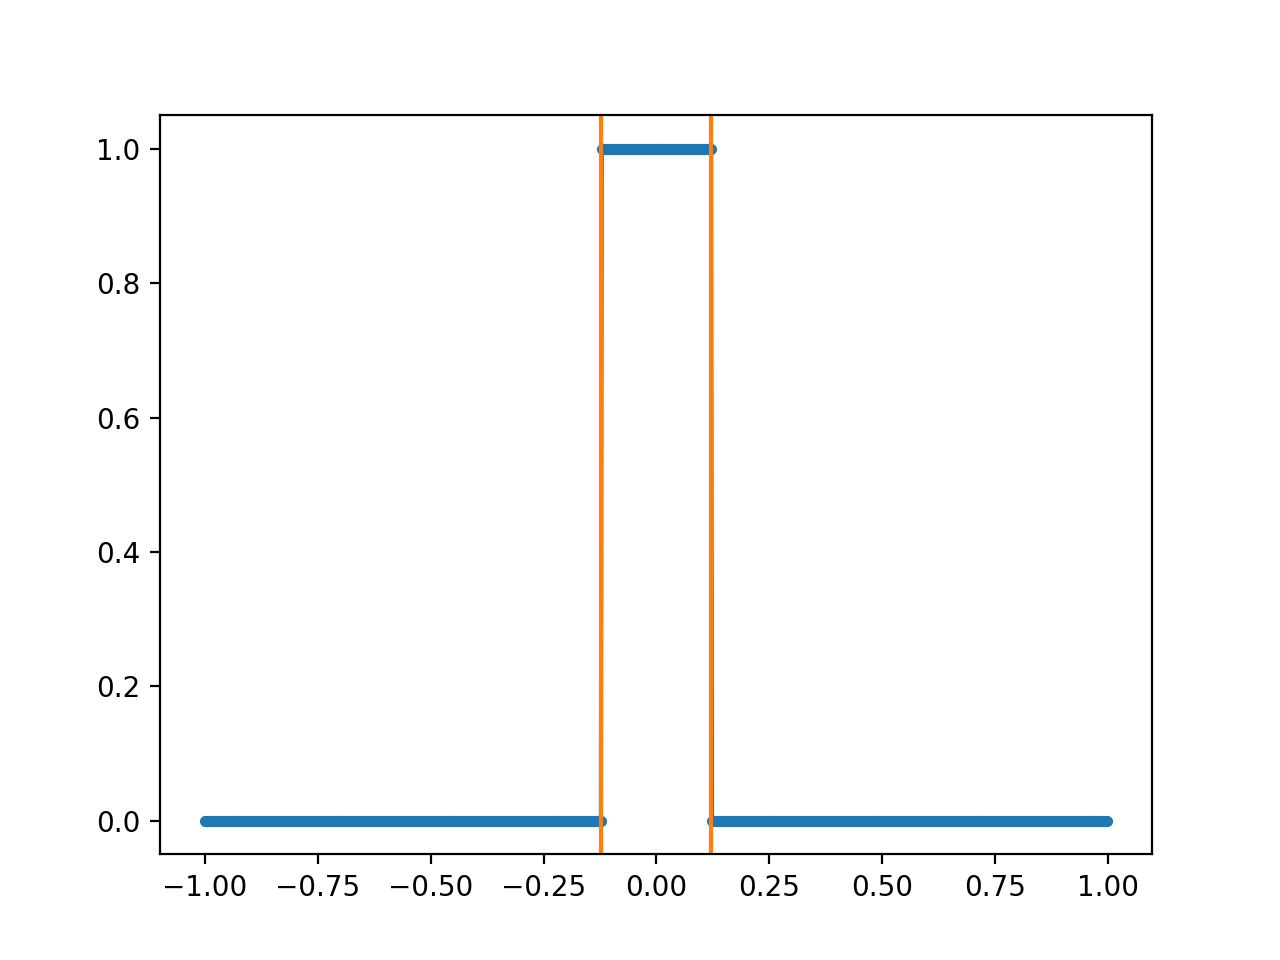

In [8]:
fig, ax = plt.subplots()
ax.plot(axis_t.centers, x, marker='.')
ax.axvline(-1/(2*a), c='C1')
ax.axvline(1/(2*a), c='C1')

In [9]:
axis_ft, x_ft = axis_t.ft(x)

In [10]:
np.max(np.abs(np.imag(x_ft)))

3.2412692472686703e-16

In [11]:
x_ft = np.real(x_ft)

In [12]:
x_ft_theory = np.sinc(axis_ft.centers/a)/np.abs(a)

<IPython.core.display.Javascript object>


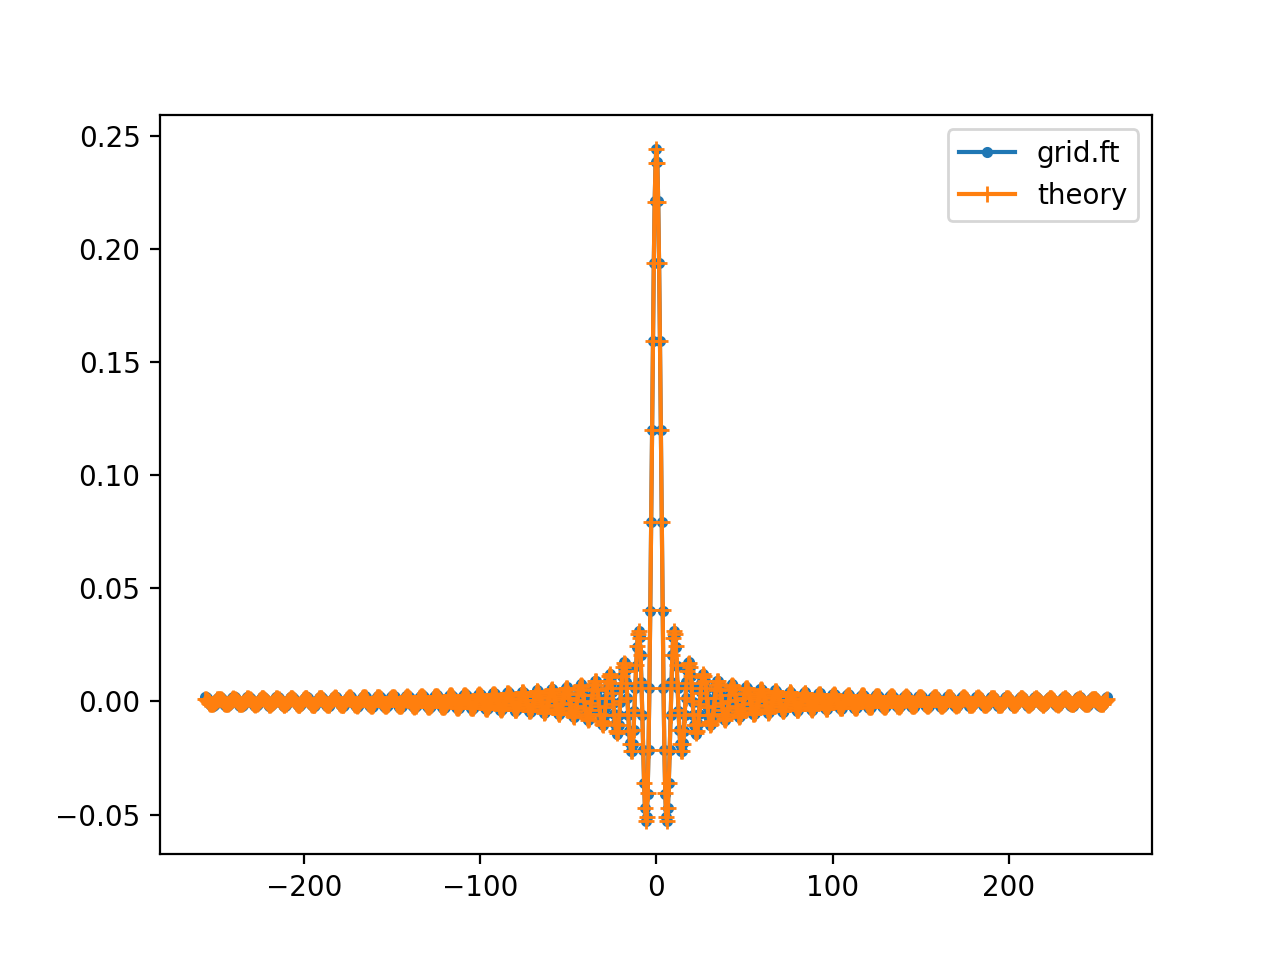

In [13]:
fig, ax = plt.subplots()
ax.plot(axis_ft.centers, x_ft, marker='.', label='grid.ft')
ax.plot(axis_ft.centers, x_ft_theory, marker='+', label='theory')
ax.legend()

In [14]:
axis_ift_theory, x_ift_theory = axis_ft.ift(x_ft_theory)

In [15]:
np.max(np.abs(np.imag(x_ift_theory)))

1.8283963581893691e-16

In [16]:
x_ift_theory = np.real(x_ift_theory)

<IPython.core.display.Javascript object>


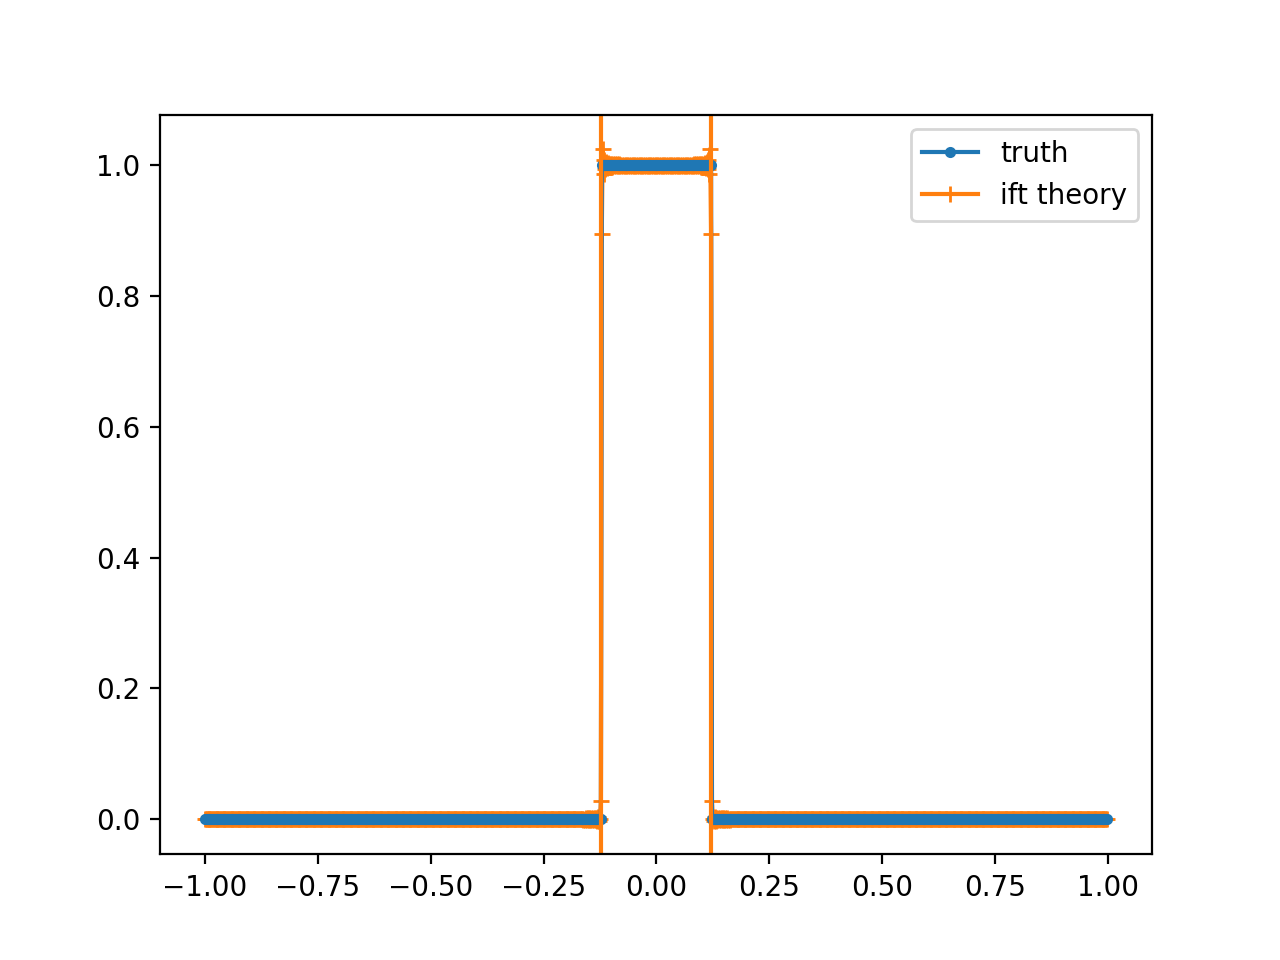

In [17]:
fig, ax = plt.subplots()
ax.plot(axis_t.centers, x, marker='.', label='truth')
ax.plot(axis_ift_theory.centers, x_ift_theory, marker='+', label='ift theory', zorder=-10)
ax.axvline(-1/(2*a), c='C1')
ax.axvline(1/(2*a), c='C1')
ax.legend();